<a href="https://colab.research.google.com/github/naghmeadibi/HW2_MachineLearnings/blob/main/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:Naghmeh Adibi

**Student ID**: 99101076

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [ ]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_val, Y_val, test_size=2/3)
print(Y_train.shape, X_train.shape)
print(Y_val.shape, X_val.shape)
print(Y_test.shape, X_test.shape)
### END CODE HERE ###

(398,) (398, 30)
(114,) (114, 30)
(57,) (57, 30)


## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**:The “C” hyperparameter controls the strength of the regularization.
A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.Set of acceptable values for C is [10, 1, 0.1, 0.01, 0.001]. We try this values, and the one with highest accurancy is the best.

In [ ]:
### START CODE HERE ###
for c in range(5):
  clf = LogisticRegression(solver='liblinear', C = pow(10, (-1*c)+1))
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_val)
  accuracy = (Y_pred == Y_val).mean()
  print('accuracy : ', accuracy, "C : ", pow(10, (-1*c)+1))
### END CODE HERE ###

accuracy :  0.9473684210526315 C :  10
accuracy :  0.9385964912280702 C :  1
accuracy :  0.9122807017543859 C :  0.1
accuracy :  0.8947368421052632 C :  0.01
accuracy :  0.8947368421052632 C :  0.001


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: C = 10 gives highest accurancy. Somthing about 0.96.

In [ ]:
### START CODE HERE ###
clf = LogisticRegression(solver='liblinear', C = 10)
clf.fit(X, Y)
test_ac = clf.score(X_test, Y_test)
print('test accuracy : ', test_ac)
### END CODE HERE ###

test accuracy :  0.9649122807017544


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

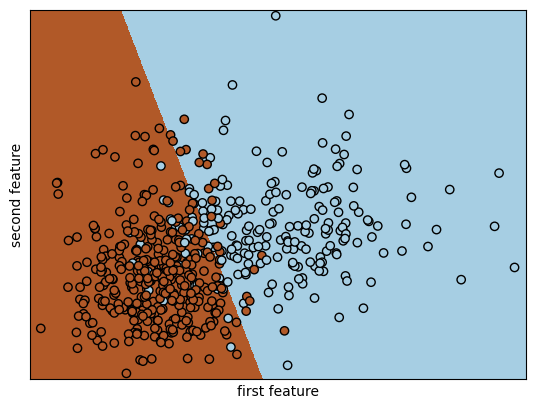

In [ ]:
### START CODE HERE ###
x = X[:, :2]
clf = LogisticRegression(random_state=0).fit(x,Y)
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xp, yp = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
pred = clf.predict(np.c_[xp.ravel(), yp.ravel()])
pred = pred.reshape(xp.shape)
plt.figure(1)
plt.pcolormesh(xp, yp, pred, cmap=plt.cm.Paired)
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.xlim(xp.min(), xp.max())
plt.ylim(yp.min(), yp.max())
plt.xticks(())
plt.yticks(())
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:Something about 0.91 based on code result.

In [ ]:
### START CODE HERE ###
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
accuracy = (Y_pred == Y_val).mean()
print("Accuracy on validation set : ", accuracy)
Y_pred = clf.predict(X_test)
accuracy = (Y_pred == Y_test).mean() 
print("Accuracy on test set : ", accuracy)
### END CODE HERE ###

Accuracy on validation set :  0.9385964912280702
Accuracy on test set :  0.9649122807017544


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:The accuracy of this method is same as GuassianNB classifier.

In [ ]:
### START CODE HERE ###
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
accuracy = (Y_pred == Y_val).mean()
print("Accuracy on validation set : ", accuracy)
Y_pred = clf.predict(X_test)
accuracy = (Y_pred == Y_test).mean() 
print("Accuracy on test set : ", accuracy)
### END CODE HERE ###

Accuracy on validation set :  0.9473684210526315
Accuracy on test set :  0.9649122807017544


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Logistic Regression with optimized C is best method for classifing this dataset. It has best accuracy among the tree. the accuracy on test set using this method is somthing about 0.95 and about 0.04 more than other methods.